# [ИИ, команда 67] EDA 1, Higgs Boson dataset

<figure>
    <img src = "https://raw.githubusercontent.com/sugatagh/Higgs-Boson-Event-Detection/main/Image/atlas_experiment.png" alt = "Higgs into fermions: Evidence of the Higgs boson decaying to fermions" width = "600">
    <figcaption> Fig 1. Higgs into fermions: Evidence of the Higgs boson decaying to fermions (image credit: CERN) </figcaption>
</figure>

Ниже представлен разведочный анализ данных по датасету [Higgs boson machine learning challenge](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) собранному в ходе экспериментов ATLAS на большом адронном коллайдере (Large Hadron Collider - LHC).

## Краткое описание признаков

1) **EventId** - Уникальный целочисленный идентификатор события.
2) **DER_mass_MMC** - Оценочная масса mH кандидата в бозоны Хиггса, полученная путем вероятностной интеграции фазового пространства.
3) **DER_mass_transverse_met_lep** - Поперечная масса (21) между недостающей поперечной энергией и лептоном.
4) **DER_mass_vis** - Инвариантная масса (20) адронного тау и лептона.
5) **DER_pt_h** - Модуль (19) векторной суммы поперечного импульса адронного тау, лептона и недостающего вектора поперечной энергии.
6) **DER_deltaeta_jet_jet** - Абсолютное значение псевдобыстротного разделения (22) между двумя струями (не определено, если PRI_jet_num ≤ 1).
7) **DER_mass_jet_jet** - Инвариантная масса (20) двух струй (не определена, если PRI_jet_num ≤ 1).
8) **DER_prodeta_jet_jet** - Произведение псевдобыстрот двух струй (не определена, если PRI_jet_num ≤ 1).
9) **DER_deltar_tau_lep** - Разделение R (23) между адронным тау и лептоном.
10) **DER_pt_tot** - Модуль (19) векторной суммы недостающих поперечных импульсов и поперечных импульсов адронного тау, лептона, ведущей струи (если PRI_jet_num ≥ 1) и следующей за ней струи (если PRI_jet_num = 2) (но не каких-либо дополнительных струй).
11) **DER_sum_pt** - Сумма модулей (19) поперечных импульсов адронного тау, лептона, ведущей струи (если PRI_jet_num ≥ 1) и следующей за ней струи (если PRI_jet_num = 2) и других струй (если PRI_jet_num = 3).
12) **DER_pt_ratio_lep_tau** - Отношение поперечных импульсов лептона и адронного тау.
13) **DER_met_phi_centrality** - Центральность азимутального угла недостающего поперечного вектора энергии.
14) **PRI_tau_pt** - Поперечный импульс адронного тау
15) **PRI_tau_eta** - Псевдобыстрота η адронного тау.
16) **PRI_tau_phi** - Азимутальный угол φ адронного тау.
17) **PRI_lep_pt** - Поперечный импульс лептона (электрона или мюона).
18) **PRI_lep_eta** - Псевдобыстрота η лептона.
19) **PRI_lep_phi** - Азимутальный угол φ лептона.
20) **PRI_met** - Недостающая поперечная энергия
21) **PRI_met_phi** - Азимутальный угол φ недостающей поперечной энергии
22) **PRI_met_sumet** - Полная поперечная энергия в детекторе.
23) **PRI_jet_num** - Количество струй (целое число со значением 0, 1, 2 или 3; возможные большие значения ограничены 3).
24) **PRI_jet_leading_pt** - Поперечный импульс ведущей струи, то есть струи с наибольшим поперечным импульсом (не определено, если PRI_jet_num = 0).
25) **PRI_jet_leading_eta** - Псевдобыстрота η ведущей струи
26) **PRI_jet_leading_phi** - Азимутальный угол φ ведущей струи
27) **PRI_jet_subleading_pt** - Поперечный импульс ведущей струи, то есть струи со вторым по величине поперечным импульсом
28) **PRI_jet_subleading_eta** - Псевдобыстрота η струи, идущей ниже
29) **PRI_jet_subleading_phi** - Азимутальный угол φ струи, идущей снизу
30) **PRI_jet_all_pt** - Скалярная сумма поперечного импульса всех струй событий.
31) **PRI_jet_all_pt** -
32) **Weight** - Вес события описан в разделе 3.3. Не использовать как признак. Недоступно в тестовом образце.
33) **Label** - Метка события y_i ∈ {s, b} (s - сигнальные события, b - фоновые события). Не использовать как признак. Недоступно в тестовом образце.

## Фоновые события, сигнальные события и область выбора. 
Фоновые события в основном производятся распадом частиц, которые, хотя и экзотические по своей природе, известны заранее из предыдущих поколений экспериментов. Целью анализа является поиск области (называемой областью выбора) в пространстве признаков, которая производит значительное превышение событий (называемых сигнальными событиями) по сравнению с тем, что могут объяснить известные фоновые процессы. После того, как область была зафиксирована, применяется статистический тест для определения значимости превышения. Если вероятность того, что превышение было произведено фоновыми процессами, падает ниже определенного предела, это указывает на обнаружение новой частицы.

**Общая цель — улучшить процедуру, которая создает область выбора, т. е. область в пространстве признаков, которая производит события сигнала.**

## Импорт библиотек

In [95]:
import math
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns

## EDA

In [16]:
df = pd.read_csv('./training.zip')
df_test = pd.read_csv('./test.zip')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [17]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [18]:
df_obs = pd.DataFrame(index = ['Количество событий'], columns = ['Тренировочный набор', 'Тестовый набор'])
df_obs['Тренировочный набор'] = len(df)
df_obs['Тестовый набор'] = len(df_test)
df_obs

,Тренировочный набор,Тестовый набор
Количество событий,250000,550000


In [19]:
df.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [22]:
# Поиск дублей
df_duplicate_rows = pd.DataFrame(index = ['Количество дублей'], columns = ['Тренировочный набор', 'Тестовый набор'])
df_duplicate_rows['Тренировочный набор'] = df.duplicated().sum()
df_duplicate_rows['Тестовый набор'] = df.duplicated().sum()
df_duplicate_rows

,Тренировочный набор,Тестовый набор
Количество дублей,0,0


In [24]:
# Поиск пропусков
df_missing = pd.DataFrame(index = ['Количество пропущеных значений'], columns = ['Тренировочный набор', 'Тестовый набор'])
df_missing['Тренировочный набор'] = len(df.isna().sum()[df.isna().sum() != 0])
df_missing['Тестовый набор'] = len(df.isna().sum()[df.isna().sum() != 0])
df_missing

,Тренировочный набор,Тестовый набор
Количество пропущеных значений,0,0


In [25]:
df.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [26]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


### Анализ целевого признака

Целевой признак `Label` является бинарным и принимает значения `b` или `s`, указывающих на природу события (фоновое или сигнал).

In [136]:
def bars_and_donut(df, col, h = 500, w = 800):
    fig = make_subplots(rows = 1, cols = 2, specs = [[{'type': 'domain'}, {'type': 'xy'}]])
    x, y = df[col].value_counts(sort = False).index.tolist(), df[col].value_counts(sort = False).tolist()

    fig.add_trace(go.Pie(values = y, labels = x, hole = 0.3, textinfo = 'label+percent', title = f"Признак: {col}", marker=dict(colors=['darkturquoise', 'darkgoldenrod'])), row = 1, col = 1)
    fig.add_trace(go.Bar(x = x, y = y, text = y, textposition = 'outside', marker_color=['darkturquoise', 'darkgoldenrod']), row = 1, col = 2)
    fig.update_layout(height = h, width = w, showlegend = False, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1), title = dict(text = f"Распределение целевого признака {col}", x = 0.5, y = 0.95)) 
    fig.show()

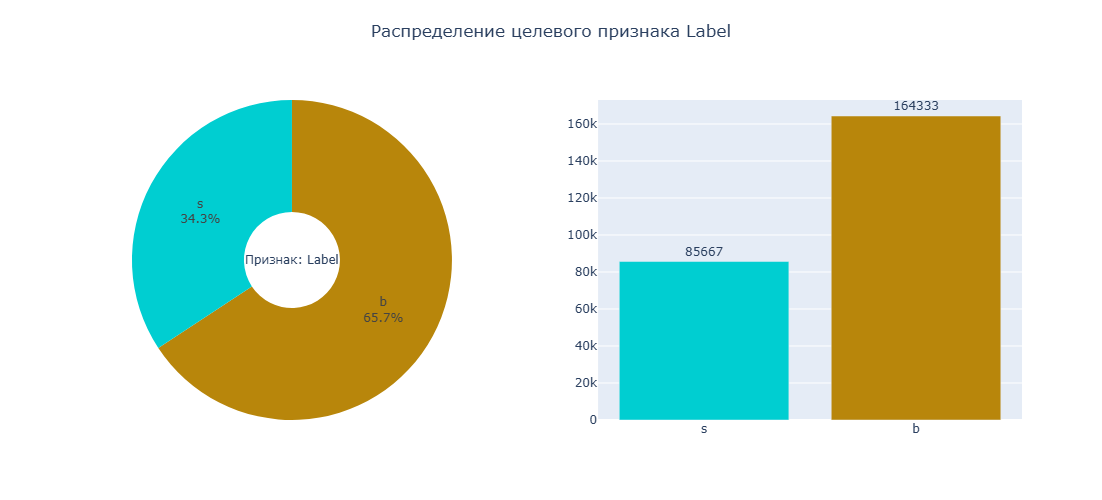

In [137]:
bars_and_donut(df, 'Label')

In [111]:
def hist(df, cols, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = 'dataset', palette = ['indigo', 'grey'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

In [112]:
# Объединение данных
df_train_temp = df.copy(deep = True)
df_train_temp['dataset'] = "train"
df_test_temp = df_test.copy(deep = True)
df_test_temp['dataset'] = "test"
df_all = pd.concat([df_train_temp, df_test_temp], axis = 0, ignore_index = True)

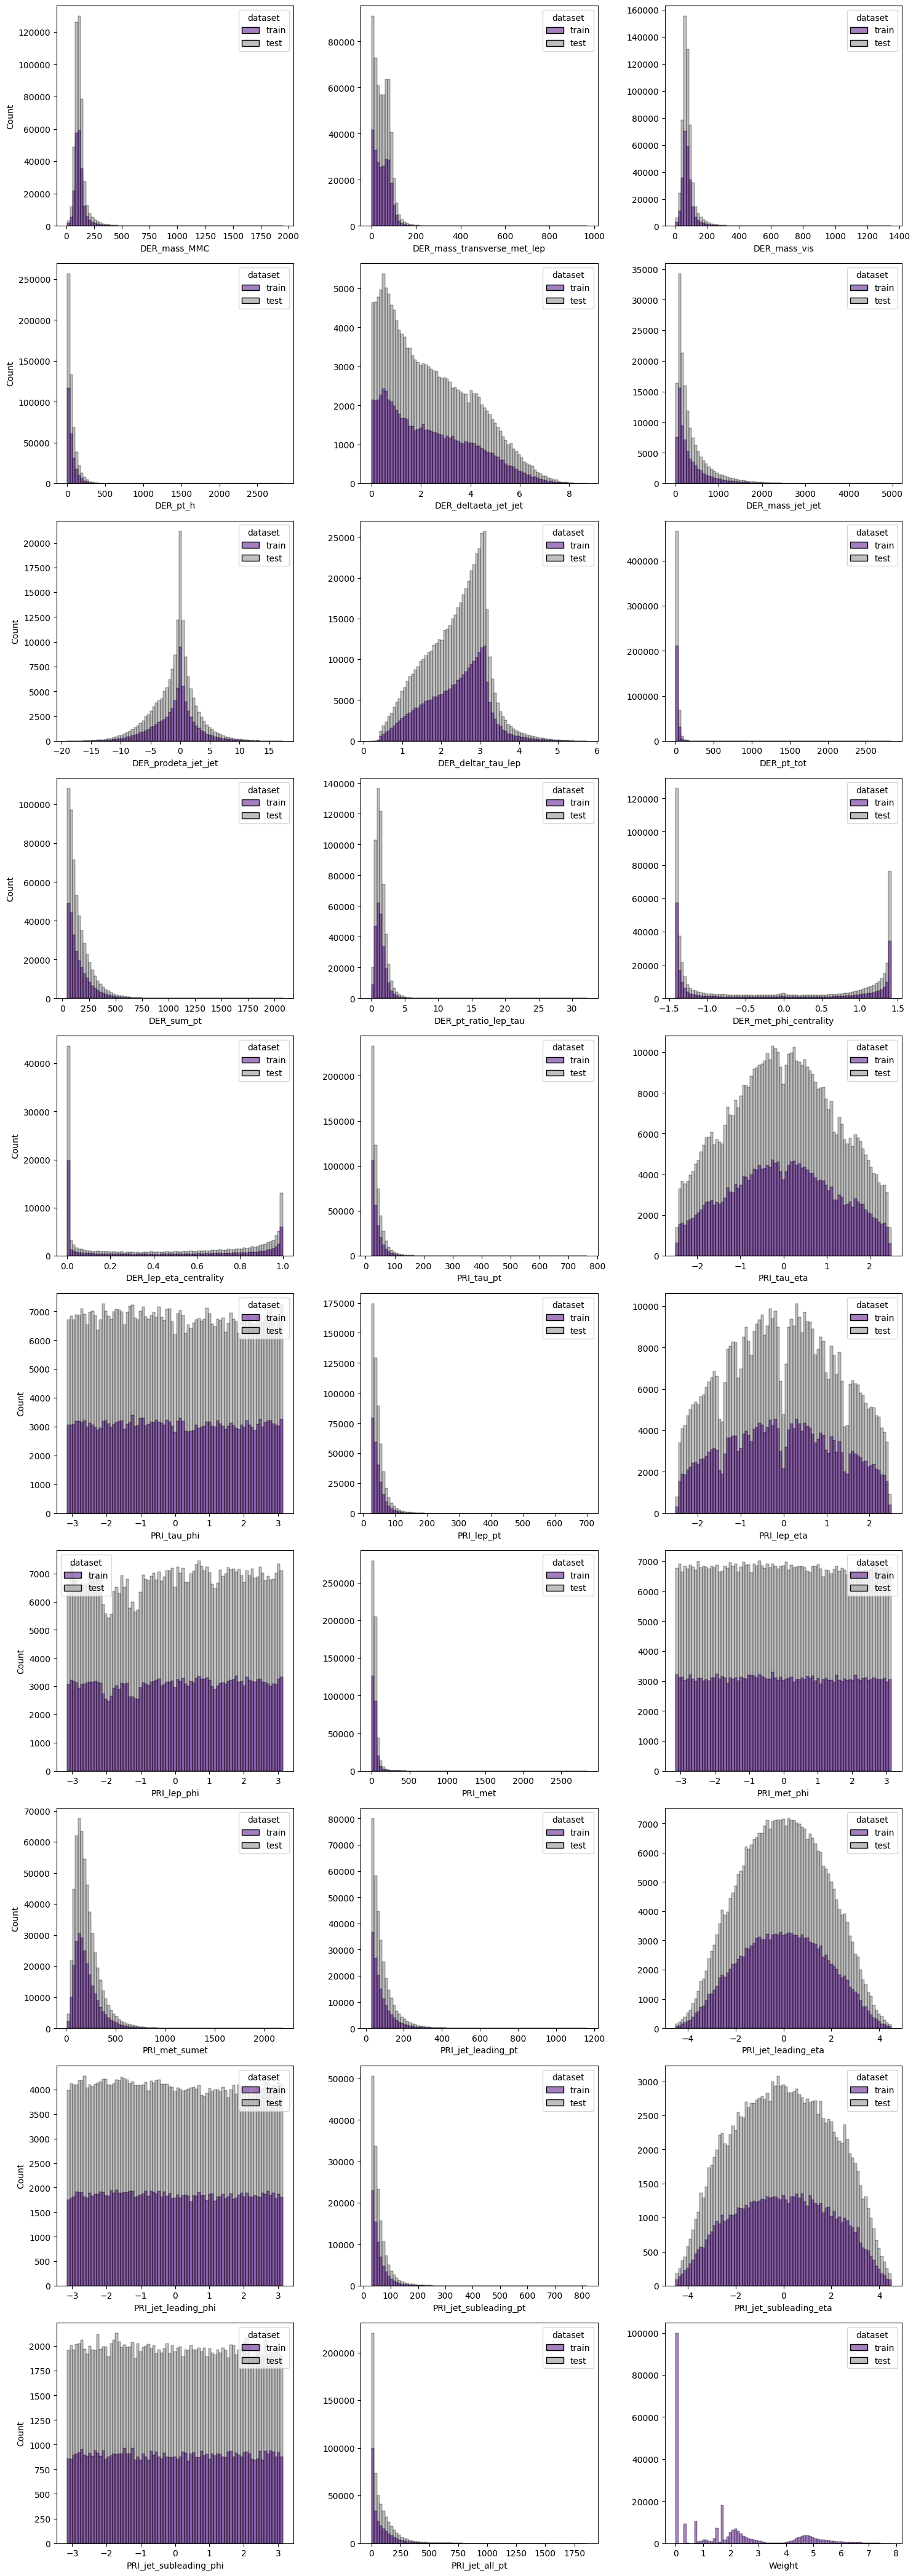

In [113]:
# Распределение остальных признаков
hist(df_all.replace(-999, np.nan),
     list(df.columns[df.dtypes == 'float64']),
     bins = max(math.floor(len(df)**(1/3)), math.floor(len(df_test)**(1/3))),
     ncols = 3)

### Сравнение распределений признаков по целевому классу в обучающей выборке
Далее мы сравниваем одномерные распределения признаков для фоновых событий и сигнальных событий в обучающем наборе. 


Если признак имеет разные распределения для фоновых и сигнальных событий, то это значит, что признак важен в задаче классификации событий, когда метка неизвестна. 


Аналогично, если признак имеет очень похожие распределения для двух целевых классов, то он вряд ли поможет в задаче классификации. 

In [116]:
def hist_target(df, cols, target, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        sns.histplot(data = df, x = cols[i], bins = bins, hue = target, palette = ['darkturquoise', 'darkgoldenrod'], ax = ax[i // ncols, i % ncols])
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
    plt.tight_layout()
    plt.show()

In [119]:
df_train_b = df[df['Label'] == 'b']
df_train_s = df[df['Label'] == 's']

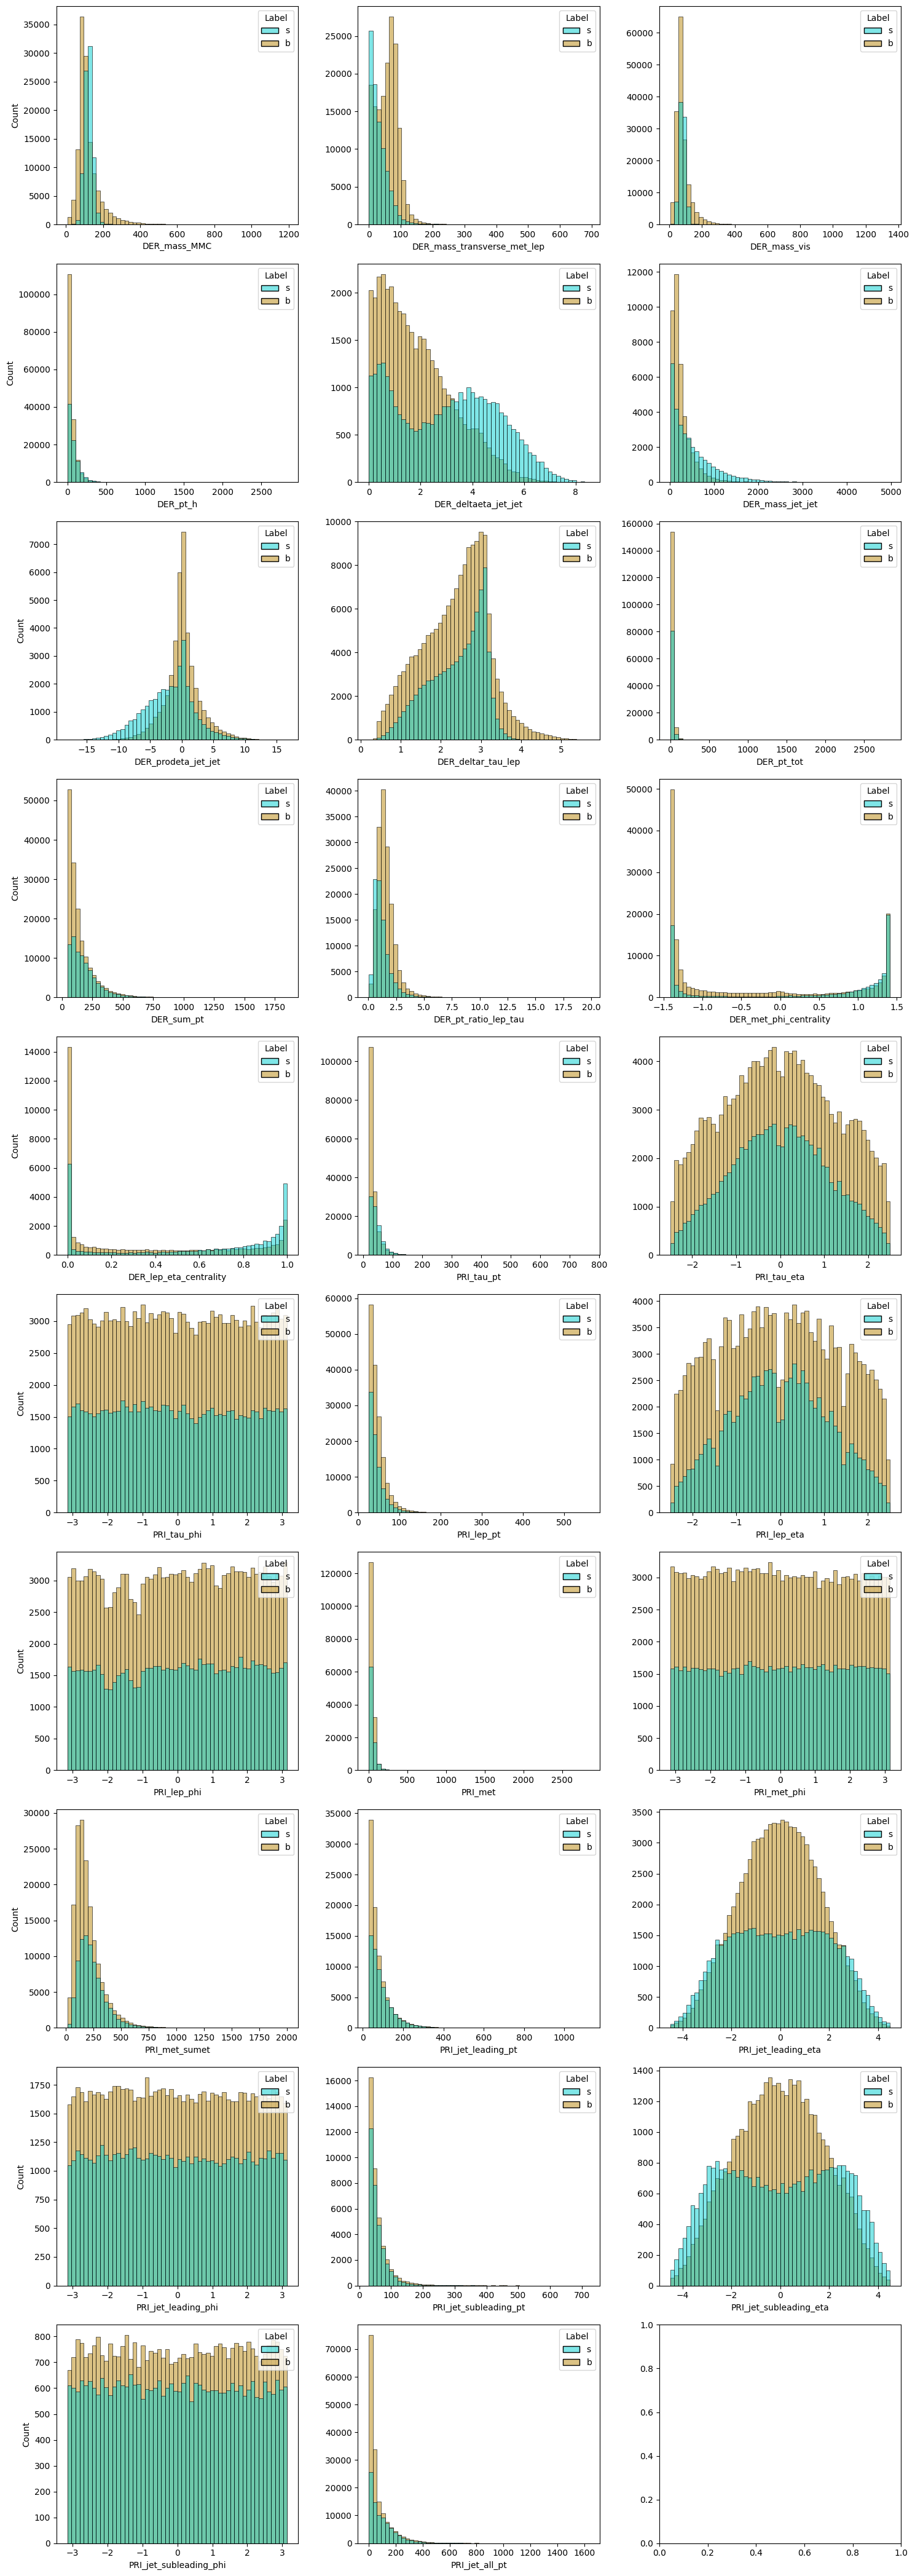

In [121]:
hist_target(df.replace(-999, np.nan),
     list(df_test.columns[df_test.dtypes == 'float64']),
     target = 'Label',
     bins = max(math.floor(len(df_train_b)**(1/3)), math.floor(len(df_train_s)**(1/3))),
     ncols = 3)

In [131]:
def donut_custom(df1, df2, col, text1, text2, title_text, h, w):
    fig = make_subplots(rows = 1, cols = 2, column_widths = [0.5, 0.5], row_heights = [0.5], specs = [[ {"type": "pie"}, {"type": "pie"}]])
    
    fig.add_trace(go.Pie(labels = df1[col].value_counts().index, values = df1[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text1)), row = 1, col = 1)
    fig.add_trace(go.Pie(labels = df2[col].value_counts().index, values = df2[col].value_counts(), legendgroup = "group", textinfo = 'percent', hole = 0.3, title = dict(text = text2)), row = 1, col = 2)
    
    fig.update_layout(height = h, width = w, title = dict(text = title_text, y = 0.9, x = 0.5, xanchor = 'center', yanchor = 'top'))
    
    fig.show()

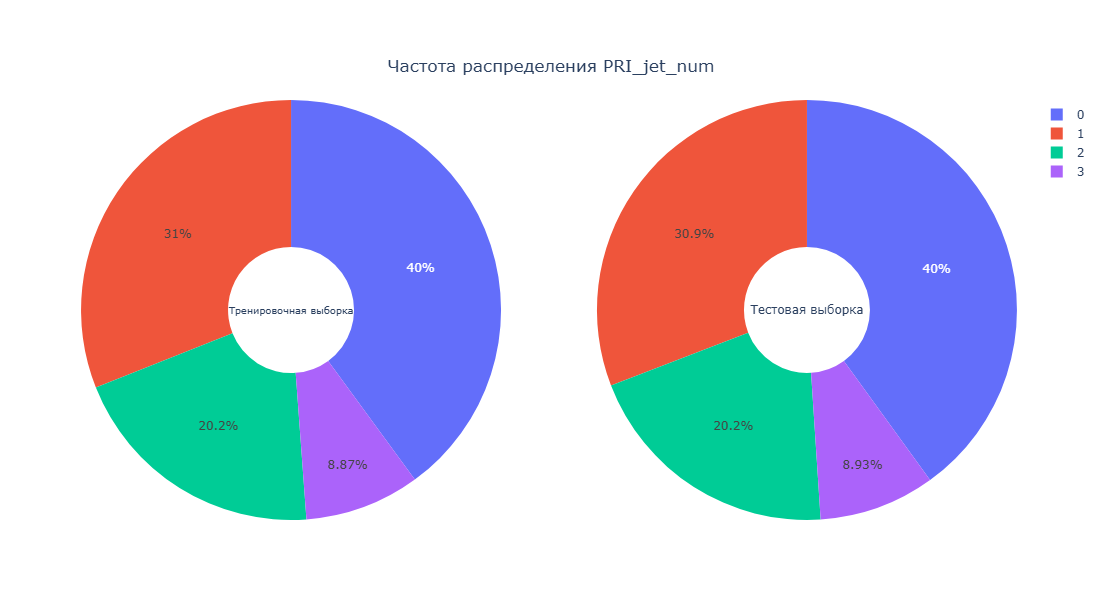

In [135]:
# Распределение целочисленных признаков (количество струй PRI_jet_num)
donut_custom(df, df_test, col = 'PRI_jet_num', text1 = 'Тренировочная выборка', text2 = 'Тестовая выборка', title_text = "Частота распределения PRI_jet_num", h=600, w=1000)

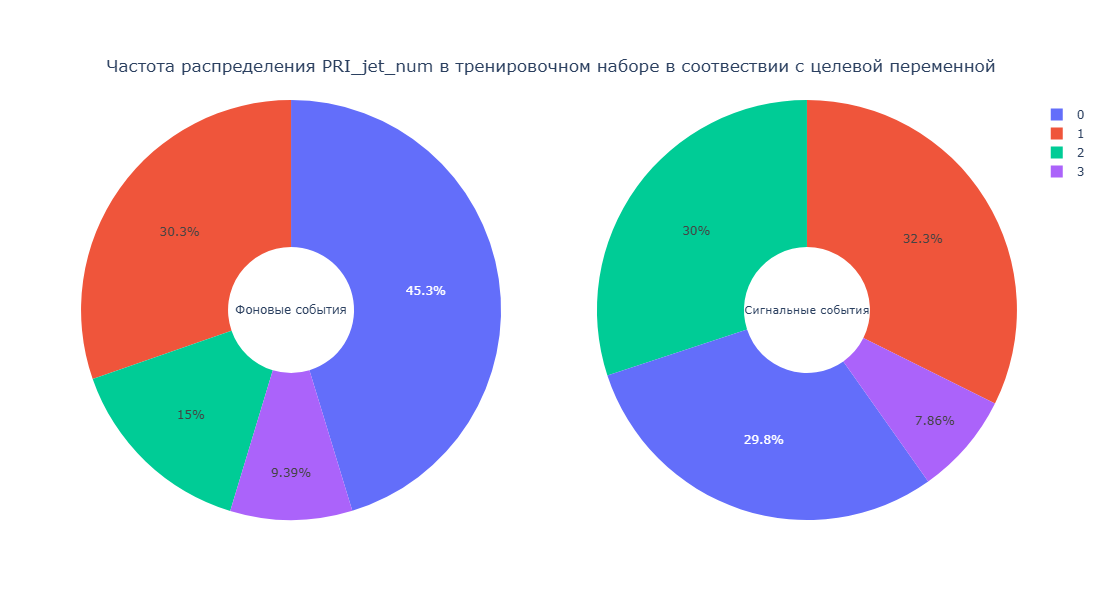

In [138]:
donut(df_train_b, df_train_s, col = 'PRI_jet_num', text1 = 'Фоновые события', text2 = 'Сигнальные события', title_text = "Частота распределения PRI_jet_num в тренировочном наборе в соотвествии с целевой переменной", h=600,w=1000)

### Краткие выводы:


Были проанализированы стандартные параметры датасета (дубли, пустоты, типы данных признаков). Из описания данных были выявлены константные заполнения (-999) для пропущенных значений.


Был проведен анализ целевой переменной и построение ее распределения. Также были построены распределения признаков в разрезе целевой переменной и разрезе треировочных и тестовых данных.


Судя по распределениям тренировочные и тестовые данных распределены одинаково, однако ряд признаков в тренировочном наборе имеет различные распределения в зависимости от целевой переменной (например DER_deltaeta_jet_jet, PRI_jet_subleading_eta, DER_lep_eta_centrality и тд). Это может свидетельствовать об особой значитмости этих признаков для классификации.
